# TASK 4: SOCIAL MEDIA FOLLOWERS PREDICTION

## This is the project for calculating the social media followers gained by V, the member of BTS when he first launched his instagram account.

### The data recorded in this, is the one I recorded just for fun for all the members of BTS when they collectively decided to launch their official instagram account.

### I never thought that I'd have been using this data ever.

### However, for this project I will be only using one member's data i.e. V.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Naming the columns a header.

In [2]:
col_names = ['date', 'followers_gained(in millions)', 'followers_lost(in millions)', 'total_followers(in millions)']
data = pd.read_csv('D:/SpaceScan/SSVIP-Data-Science-Task4/Dataset/taeV.csv', header=None, names=col_names)
data

,date,followers_gained(in millions),followers_lost(in millions),total_followers(in millions)
0,06-12-21,12.0,0,12.0
1,07-12-21,8.3,0,20.3
2,08-12-21,2.0,0,22.3
3,09-12-21,1.0,0,23.3
4,10-12-21,0.8,0,24.1
5,11-12-21,0.6,0,24.7
6,12-12-21,1.1,0,25.8


## Something to be noticed is that, during the time of collecting and recording the followers. 
## The followers were in millions but only the millionth value was recorded, so there might not be accuracy.

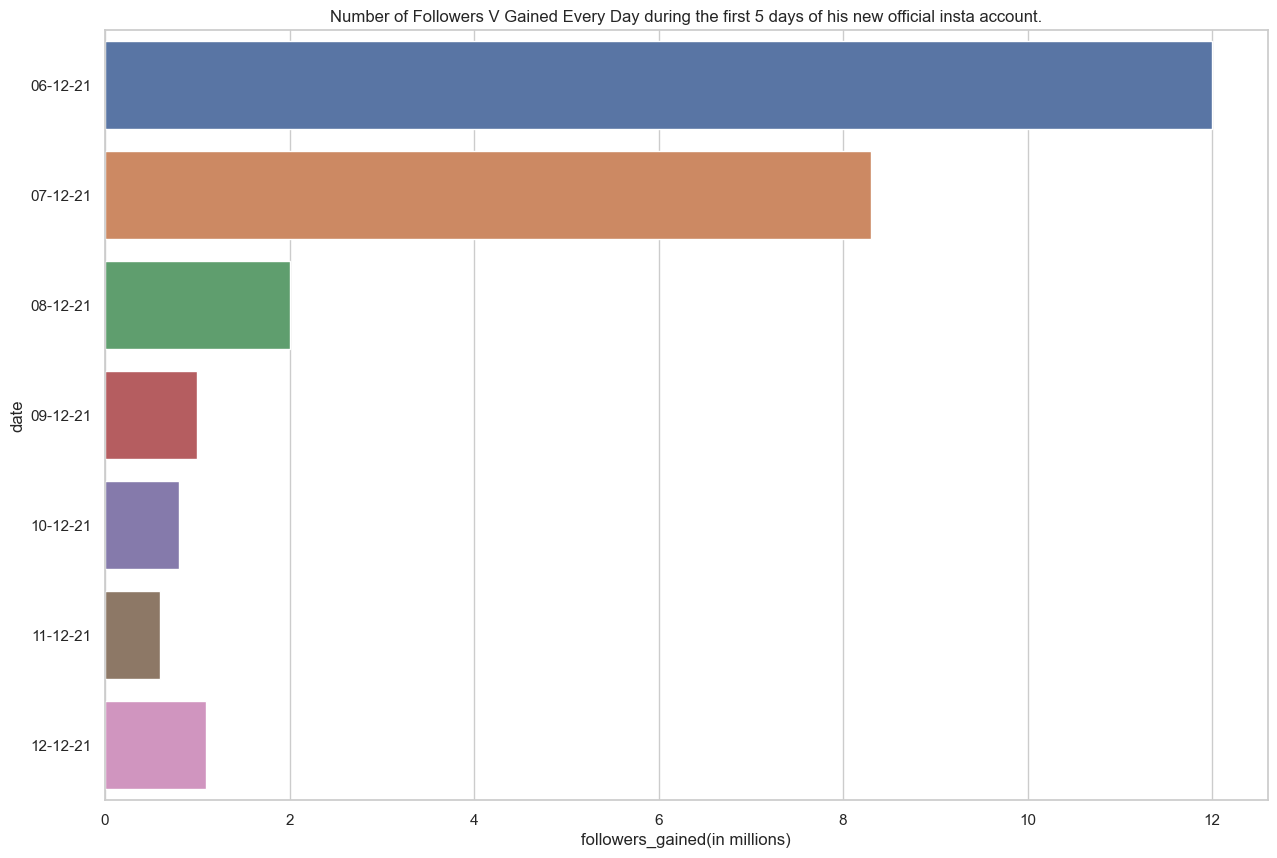

In [3]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")
plt.title("Number of Followers V Gained Every Day during the first 5 days of his new official insta account.")
sns.barplot(x="followers_gained(in millions)", y="date", data=data)
plt.show()

# Since the first value of the data is recorded during the opening of the account so the value is skewed. To minimize the error, lets delete the first, second and third day value.

## This was the data of the very first few days of opening an account of a major celebrity so the folowers_gained might have been a lot for our algorithm.


In [4]:
new_data = pd.DataFrame(data)
new_data = new_data.iloc[3:]

new_data.head()

,date,followers_gained(in millions),followers_lost(in millions),total_followers(in millions)
3,09-12-21,1.0,0,23.3
4,10-12-21,0.8,0,24.1
5,11-12-21,0.6,0,24.7
6,12-12-21,1.1,0,25.8


# I used  statsmodels library in Python for time series forcasting 

In [5]:
import statsmodels.api as sm

In [6]:
df = pd.DataFrame(new_data)

df.head()

,date,followers_gained(in millions),followers_lost(in millions),total_followers(in millions)
3,09-12-21,1.0,0,23.3
4,10-12-21,0.8,0,24.1
5,11-12-21,0.6,0,24.7
6,12-12-21,1.1,0,25.8


In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%y')

In [8]:
# Set the date column as the index
df.set_index('date', inplace=True)

In [9]:
# Fit a SARIMA model to the data
model = sm.tsa.SARIMAX(df['total_followers(in millions)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()


# Forecast future total followers
forecast = results.get_forecast(steps=10)  # Adjust the number of steps as needed

# Print the forecasted values
print(forecast.predicted_mean)

2021-12-13    25.800000
2021-12-14    25.800000
2021-12-15    25.800000
2021-12-16    25.800000
2021-12-17    25.800000
2021-12-18    25.800000
2021-12-19    25.800000
2021-12-20    25.800000
2021-12-21    37.450006
2021-12-22    38.250006
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


# According to the algorthim the date in which V surpassed 30 millions is on 21st december but according to 
#https://www.zoomtventertainment.com/korean/bts-v-casually-made-a-world-record-with-his-30-million-instagram-followers-and-did-not-even-know-about-it-article-88678753#:~:text=On%20January%206%2C%20BTS%20will%20complete%20one%20month,having%20achieved%20the%20same%20in%20just%2027%20days.

# he surpassed it in 6th January.

## This kind of error is expected when predicting the social media followers because a lot of external factors like marketing, branding, etc affect the analysis of the celebrities.

## Also, the data recorded is of the first few dats of a newly  made account of a worldwide popular celebrity so the data is skewed.